In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [75]:
df = pd.read_csv('leaves.csv')

In [76]:
df.columns = range(0,16)

In [77]:
y = df[0]
X = df.drop(columns = 0 , axis = 1)
scaler = preprocessing.StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))

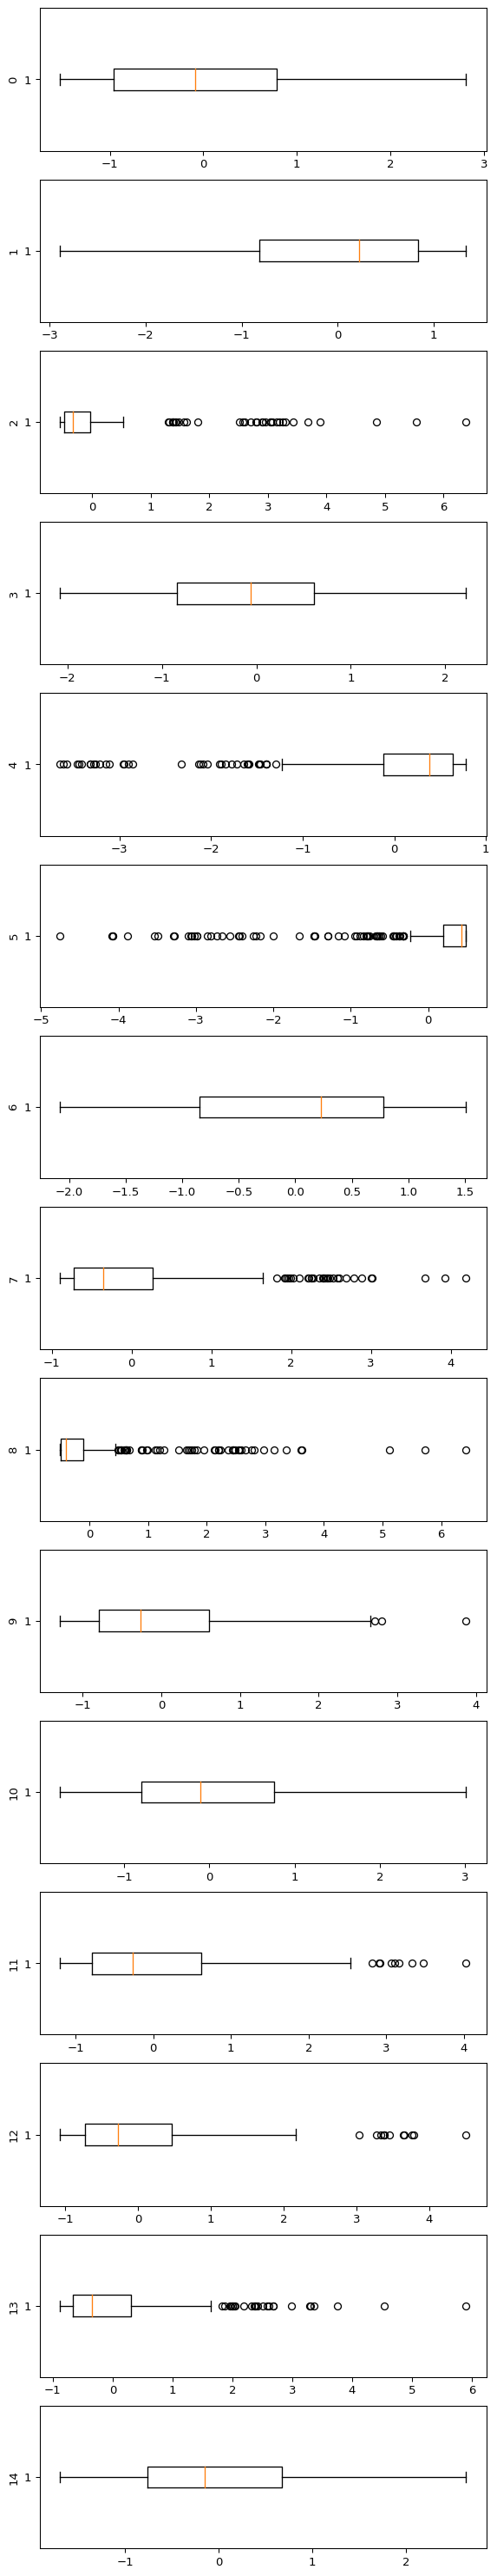

In [78]:
fig, axs = plt.subplots(15,dpi=95, figsize=(7,40))
i = 0
for col in X.columns:
    axs[i].boxplot(X[col] , vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [79]:
# outlier_data = []
# for col in X.columns:
#     Q1 = np.percentile(X[col], 15, method='midpoint')
#     Q6 = np.percentile(X[col], 85, method='midpoint')
#     IQR = Q6 - Q1
#     outlier_data.extend(X[X[col] > Q6 + IQR * 1.5].index)
#     outlier_data.extend(X[X[col] < Q1 - IQR * 1.5].index)
# X.drop(outlier_data , inplace = True)
# y.drop(outlier_data, inplace = True)

In [80]:
print(y.shape)
X.shape

(339,)


(339, 15)

In [81]:
# fig, axs = plt.subplots(15,dpi=95, figsize=(7,40))
# i = 0
# for col in X.columns:
#     axs[i].boxplot(X[col] , vert=False)
#     axs[i].set_ylabel(col)
#     i += 1
# plt.show()

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [113]:
# y = y.astype(np.int32)
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [114]:
model = svm.SVC(kernel='rbf', C=10 , decision_function_shape='ovo')
print(y_train.shape , X_train.shape)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

(271,) (271, 15)


0.8382352941176471

In [116]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.75

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=9)
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.7794117647058824

14


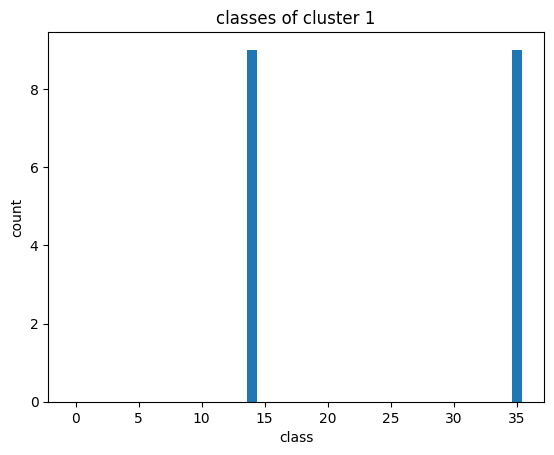

23


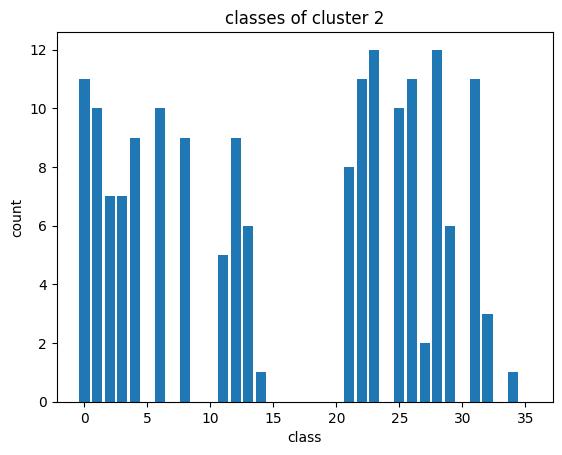

7


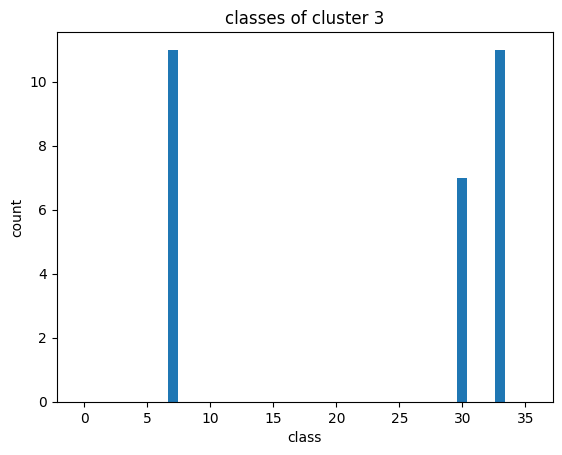

10


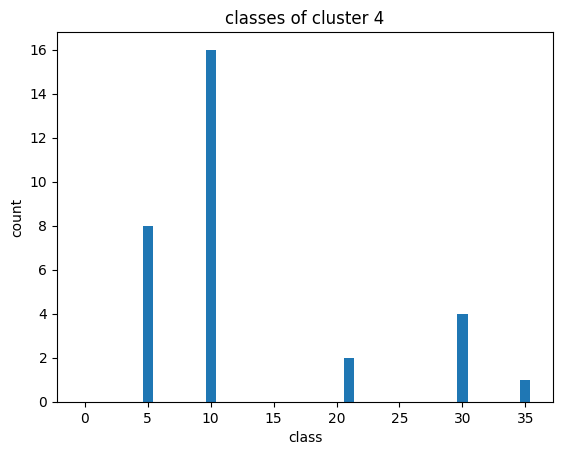

9


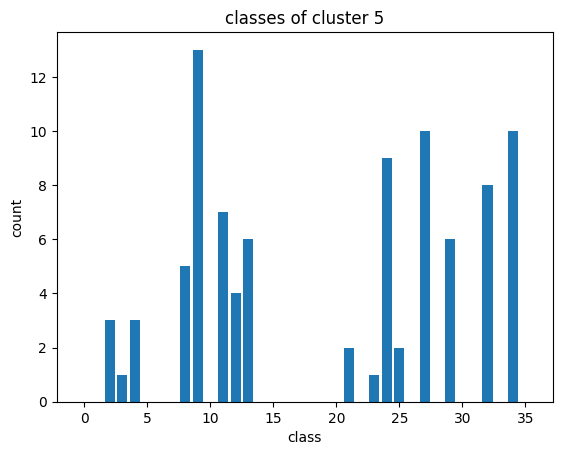

silhouette_score:  0.31218415064008725


In [271]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
model = KMeans(5)
model.fit(X)
labels = model.labels_
dict = {}
for i in range(max(labels)+1):
    dict[i] = np.zeros(36)
for i in range(len(labels)):
    dict[labels[i]][y[i]-1] += 1
for i in range(5):
    print(dict[i].argmax())
    plt.bar(range(36) , dict[i])
    plt.xlabel('class')
    plt.ylabel('count')
    plt.title(f'classes of cluster {i + 1}')
    
    plt.show()
print('silhouette_score: ' , silhouette_score(labels=labels , X=X))

9


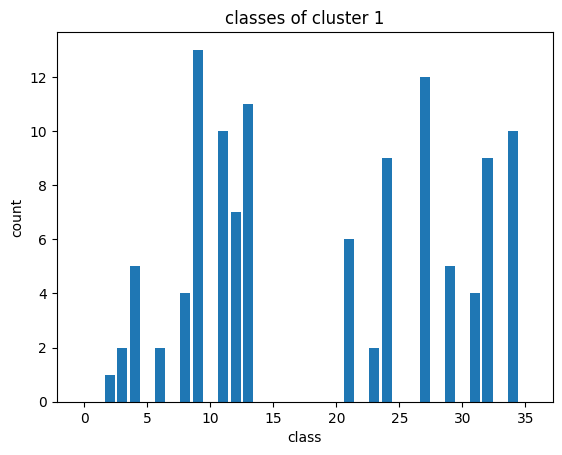

25


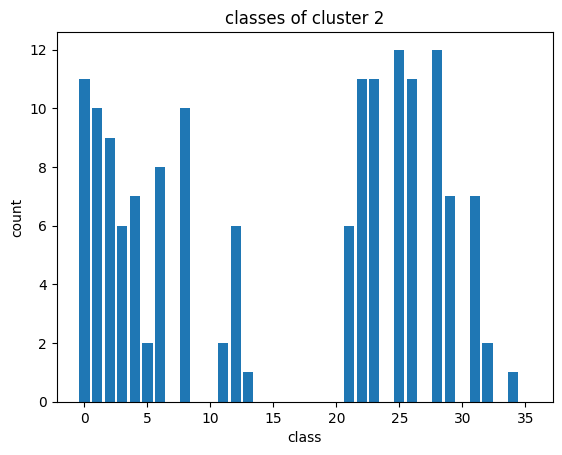

10


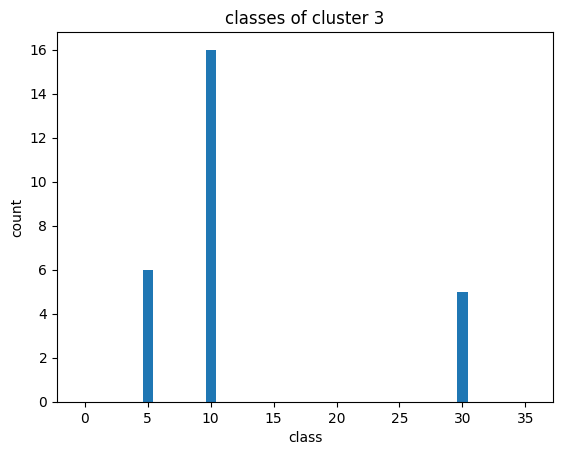

7


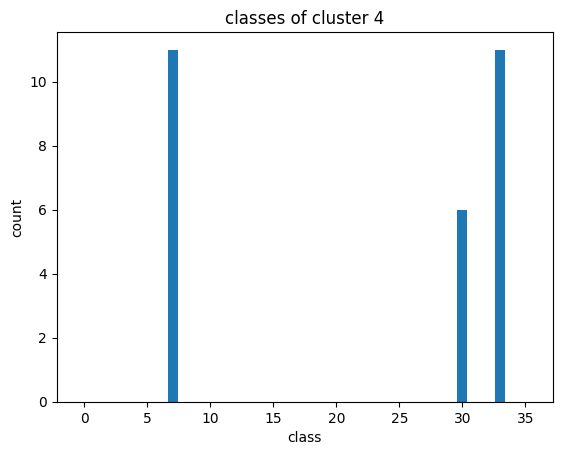

14


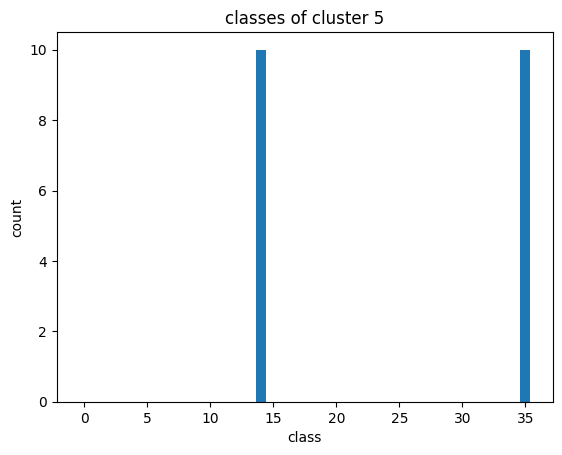

silhouette_score:  0.26753952133951564


In [272]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(5)
model.fit(X)
silhouette_score(labels=model.labels_ , X=X)
dict = {}
labels = model.labels_
for i in range(max(labels)+1):
    dict[i] = np.zeros(36)
for i in range(len(labels)):
    dict[labels[i]][y[i]-1] += 1
for i in range(5):
    print(dict[i].argmax())
    plt.bar(range(36) , dict[i])
    plt.xlabel('class')
    plt.ylabel('count')
    plt.title(f'classes of cluster {i + 1}')
    
    plt.show()
print('silhouette_score: ' , silhouette_score(labels=labels , X=X))

8


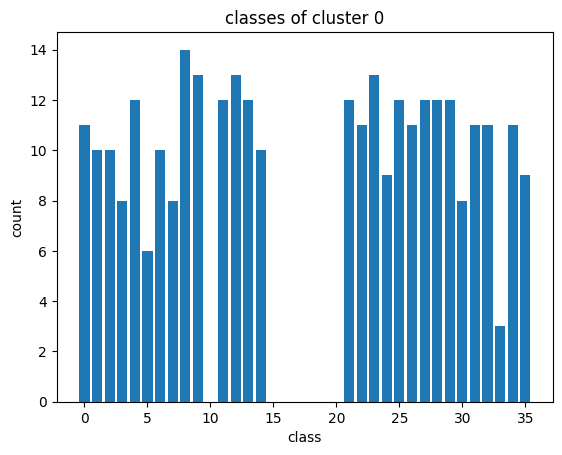

33


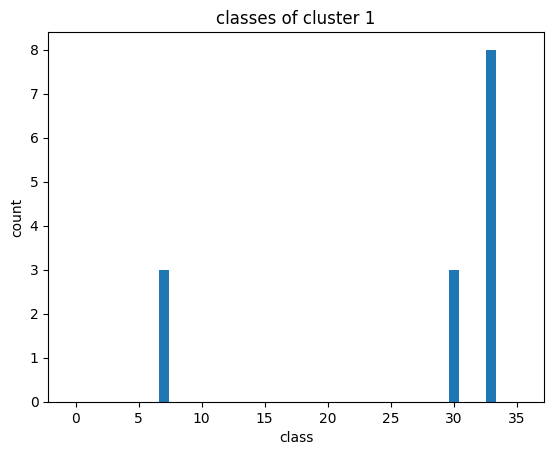

10


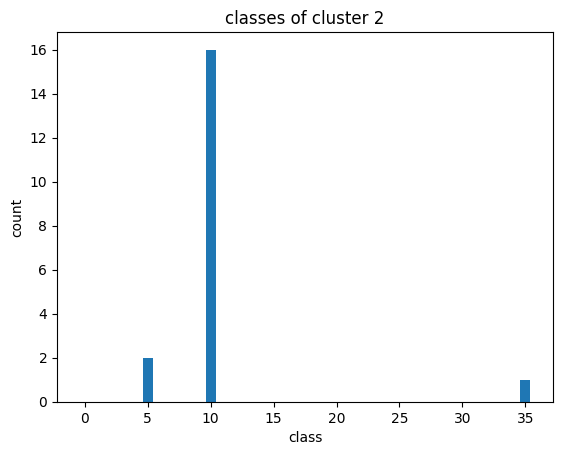

silhouette_score:  0.2062341547215817


In [275]:
from sklearn.cluster import OPTICS
model = OPTICS(min_samples=10)
model.fit(X)
silhouette_score(labels=model.labels_ , X=X)
labels = model.labels_
for i in range(-1 , max(labels)+1):
    dict[i] = np.zeros(36)
for i in range(len(labels)):
    dict[labels[i]][y[i]-1] += 1
for i in range(-1,max(labels)+1):
    print(dict[i].argmax())
    plt.bar(range(36) , dict[i])
    plt.xlabel('class')
    plt.ylabel('count')
    plt.title(f'classes of cluster {i + 1}')
    
    plt.show()
print('silhouette_score: ' , silhouette_score(labels=labels , X=X))